In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import quantstats as qs
from scipy import stats
import matplotlib.pyplot as plt


from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score

In [37]:
lstm_df = pd.read_csv('lstm_results.csv')
xg_df = pd.read_csv('xg_results.csv')
transformer_df = pd.read_csv('transformer_results.csv')

In [38]:
lstm_df

,Unnamed: 0,Brazil Returns,Russia Returns,India Returns,China Returns,South Africa Returns
0,0,-0.004931,-0.003913,-0.001125,-0.003190,-0.005263
1,1,-0.005599,-0.004400,-0.001341,-0.003685,-0.005855
2,2,-0.005607,-0.004414,-0.001347,-0.003677,-0.005862
3,3,-0.005594,-0.004417,-0.001354,-0.003637,-0.005847
4,4,-0.005580,-0.004413,-0.001364,-0.003598,-0.005826
...,...,...,...,...,...,...
798,798,0.002220,0.001811,0.000705,0.001935,0.001490
799,799,0.000942,0.000724,0.000430,0.001027,0.000236
800,800,0.000563,0.000435,0.000285,0.000790,-0.000086
801,801,0.000455,0.000383,0.000179,0.000756,-0.000128


In [8]:
# extend pandas functionality with metrics, etc.
qs.extend_pandas()
# fetch the daily returns for a stock
stock = qs.utils.download_returns('TSLA')

# show sharpe ratio
qs.stats.sharpe(stock)

# or using extend_pandas() :)
stock.sharpe()

0.9881482719583125

In [10]:
stock

Date
2010-06-29 00:00:00-04:00         NaN
2010-06-30 00:00:00-04:00   -0.002511
2010-07-01 00:00:00-04:00   -0.078473
2010-07-02 00:00:00-04:00   -0.125683
2010-07-06 00:00:00-04:00   -0.160937
                               ...   
2022-10-19 00:00:00-04:00    0.008402
2022-10-20 00:00:00-04:00   -0.066474
2022-10-21 00:00:00-04:00    0.034543
2022-10-24 00:00:00-04:00   -0.014876
2022-10-25 00:00:00-04:00    0.052876
Name: Close, Length: 3104, dtype: float64

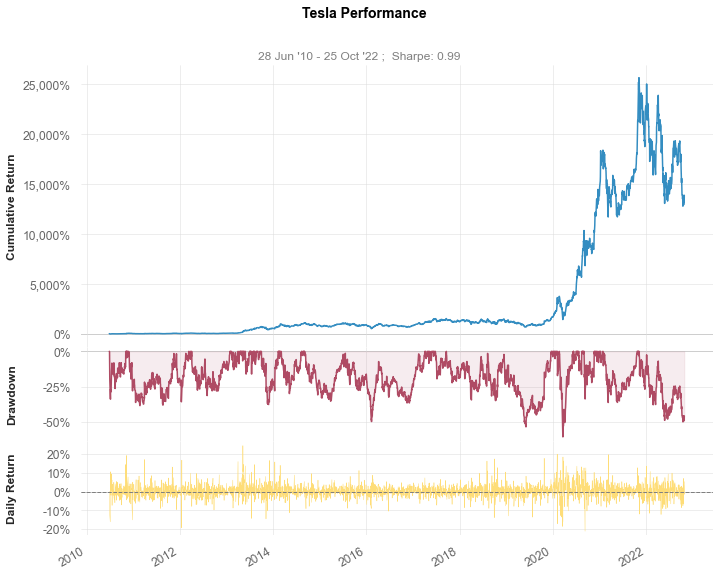

In [11]:
qs.plots.snapshot(stock, title='Tesla Performance')

In [13]:
stock = qs.utils.download_returns('AAPL')

# show sharpe ratio
qs.stats.sharpe(stock)

# or using extend_pandas() :)
stock.sharpe()

0.6181079205508291

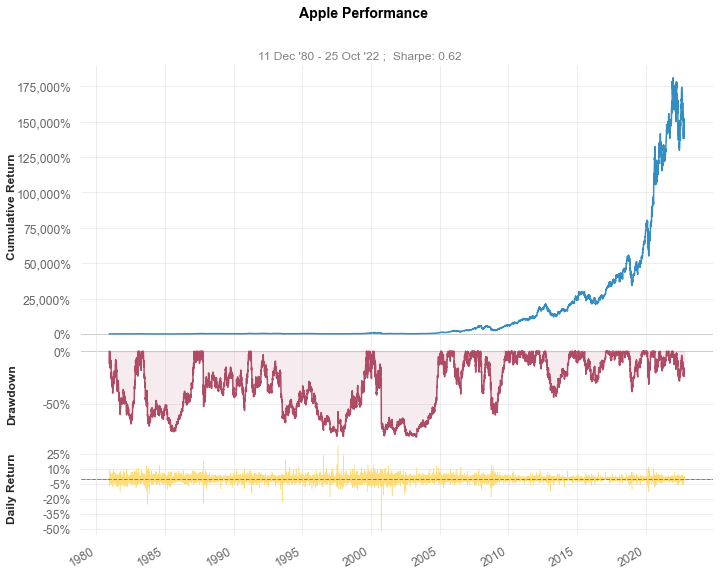

In [14]:
qs.plots.snapshot(stock, title='Apple Performance')

In [18]:
dji = qs.utils.download_returns('DJI')

In [30]:
df_dji = dji.to_frame() 

In [34]:
df_dji.head()

,Close
Date,
1970-01-02 00:00:00-05:00,NaN
1970-01-05 00:00:00-05:00,0.002607
1970-01-06 00:00:00-05:00,-0.009429
1970-01-07 00:00:00-05:00,-0.002302
1970-01-08 00:00:00-05:00,0.000324


In [35]:
df_dji.index.tz_localize(None)

DatetimeIndex(['1970-01-02', '1970-01-05', '1970-01-06', '1970-01-07',
               '1970-01-08', '1970-01-09', '1970-01-12', '1970-01-13',
               '1970-01-14', '1970-01-15',
               ...
               '2022-02-16', '2022-02-17', '2022-02-18', '2022-02-22',
               '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-28',
               '2022-03-01', '2022-03-02'],
              dtype='datetime64[ns]', name='Date', length=12987, freq=None)

In [26]:
type(stock)

pandas.core.series.Series

In [25]:
qs.reports.full(stock, "DJI")

TypeError: Invalid comparison between dtype=datetime64[ns, America/New_York] and datetime